In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt

In [2]:
p = pd.read_csv("semen.csv")
a = p[4:]
a["merr"] = 0.1
a["berr"] = 0.003

/var/folders/22/r034tgc508146mmzbyqzpmqm0000gn/T/ipykernel_14483/1507317486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["merr"] = 0.1
/var/folders/22/r034tgc508146mmzbyqzpmqm0000gn/T/ipykernel_14483/1507317486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["berr"] = 0.003


In [3]:
a

,b0,m,merr,berr
4,0.459800,51.0,0.1,0.003
5,0.306008,30.0,0.1,0.003
6,0.413633,45.0,0.1,0.003
7,0.780000,98.7,0.1,0.003
8,0.524550,62.8,0.1,0.003


In [4]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata=a["m"], ydata=a["b0"], )

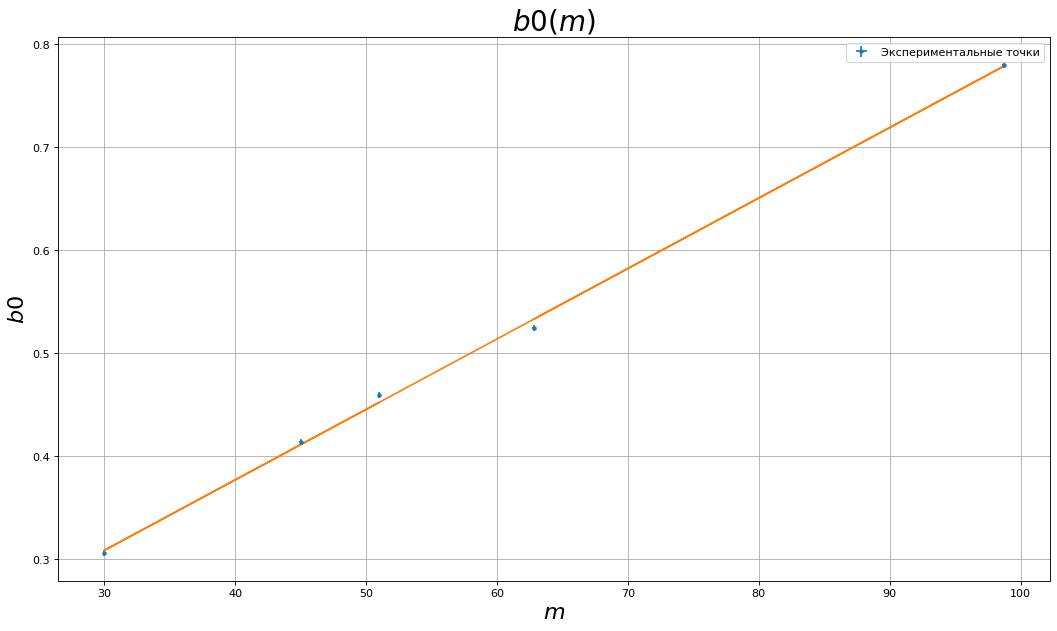

In [5]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=a["m"], y=a["b0"], xerr=a["merr"], yerr=a["berr"], fmt='.', label='Экспериментальные точки')
plt.title(r"$b0(m)$", fontsize=25)
plt.xlabel(r"$m$", fontsize=20)
plt.ylabel(r"$b0$", fontsize=20)
plt.grid(True)
plt.legend()
plt.plot(a["m"], line(a["m"], params[0], params[1]), label="Истиная зависимость")
plt.savefig("semen1.png")

In [6]:
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = 0.00684 ± 0.00013
b = 0.103 ± 0.0083
